# Armed Bandit Problem
### Name: Avinash Shanker
#### Email: avinash270394@gmail.com
#### Indian Institute of Science
#### Reinforcement Learning - Assignment I



## Part1: $\epsilon$-Greedy Method
Settings:
1. Number of Arms = 20
2. Variance = 1
3. Two graphs plotted for Average Reward vs Steps and Optimal Action vs Steps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Bandit Settings
* Number of Arms of bandit is set here
* Number of step times and
* number of bandit problems are set here

In [2]:
n_bandit=2000 # number of bandit problems
k=20 # number of arms in each bandit problem
n_pulls=2000 # number of step times to pull each arm

q_true=np.random.normal(0,1,(n_bandit,k)) # generating the true means q*(a) for each arm for all bandits
true_opt_arms=np.argmax(q_true,1) # the true optimal arms in each bandit
# each row represents a bandit problem

### Value for Epsilon is set Here
* Comparing data for 5 different values of epsilon

In [3]:
epsilon=[0,0.01,0.1,0.25,1] # epsilon in epsilon-greedy method
col=['r','g','k','b','y']

### Main Logic For $\epsilon$-Greedy Method
* This part includes graph
* Graph plot settings are here

Runnig for epsilon 0 ...
Runnig for epsilon 1 ...
Runnig for epsilon 2 ...
Runnig for epsilon 3 ...
Runnig for epsilon 4 ...


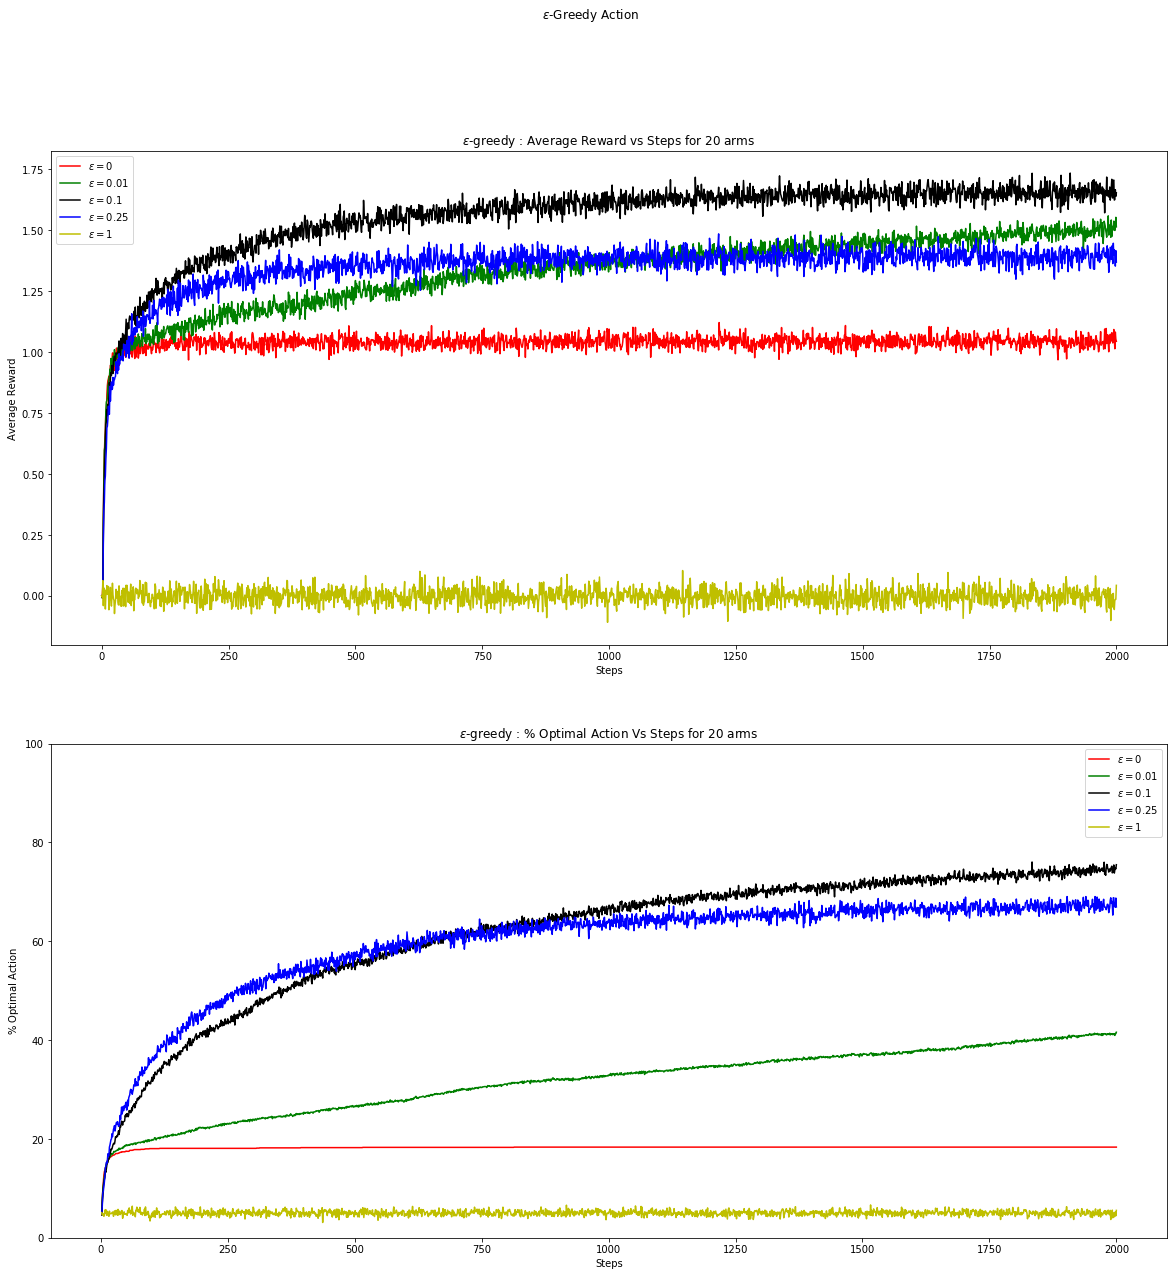

In [4]:
fig, axs = plt.subplots(2,figsize=(20, 20))
fig.suptitle('$\epsilon$-Greedy Action')

for eps in range(len(epsilon)) : 

	print ('Runnig for epsilon',eps, '...')

	Q=np.zeros((n_bandit,k)) # reward estimated
	N=np.ones((n_bandit,k)) # number of times each arm was pulled # each arm is pulled atleast once
	# Pull all arms once
	Qi=np.random.normal(q_true,1) # initial pulling of all arms

	R_eps=[]
	R_eps.append(0)
	R_eps.append(np.mean(Qi))	
	R_eps_opt=[]

	for pull in range(2,n_pulls+1) :  
		R_pull=[] # all rewards in this pull/time-step
		opt_arm_pull=0 # number of pulss of best arm in this time step
		for i in range(n_bandit) : 	

			if random.random()<epsilon[eps] : 
				j=np.random.randint(k)											
			else : 
				j=np.argmax(Q[i])

			if j==true_opt_arms[i] : # To calculate % optimal action
				opt_arm_pull=opt_arm_pull+1

			temp_R=np.random.normal(q_true[i][j],1)
			R_pull.append(temp_R)
			N[i][j]=N[i][j]+1
			Q[i][j]=Q[i][j]+(temp_R-Q[i][j])/N[i][j]
		
		avg_R_pull=np.mean(R_pull)		
		R_eps.append(avg_R_pull)
		R_eps_opt.append(float(opt_arm_pull)*100/2000)
	axs[0].plot(range(0,n_pulls+1),R_eps,col[eps])
	axs[0].set_title(r'$\epsilon$-greedy : Average Reward vs Steps for 20 arms')
	axs[0].set_ylabel('Average Reward')
	axs[0].set_xlabel('Steps')
	axs[0].legend((r"$\epsilon=$"+str(epsilon[0]),r"$\epsilon=$"+str(epsilon[1]),r"$\epsilon=$"+str(epsilon[2]),r"$\epsilon=$"+str(epsilon[3]),r"$\epsilon=$"+str(epsilon[4])),loc='best')
	axs[1].plot(range(2,n_pulls+1),R_eps_opt,col[eps])
	axs[1].set_title(r'$\epsilon$-greedy : $\%$ Optimal Action Vs Steps for 20 arms')
	axs[1].set_ylabel(r'$\%$ Optimal Action')
	axs[1].set_xlabel('Steps')
	axs[1].set_ylim(0,100)
	axs[1].legend((r"$\epsilon=$"+str(epsilon[0]),r"$\epsilon=$"+str(epsilon[1]),r"$\epsilon=$"+str(epsilon[2]),r"$\epsilon=$"+str(epsilon[3]),r"$\epsilon=$"+str(epsilon[4])),loc='best')




## Part 2: Upper Confindence Bound Implementation
Settings:
1. Number of Arms = 20
2. Three graphs plotted for
 * Average Reward vs Steps
 * Optimal Action vs Steps
 * e-greedy vs UCB method

In [5]:
q_true=np.random.normal(0,1,(n_bandit,k)) # generating the true means q*(a) for each arm for all bandits
true_opt_arms=np.argmax(q_true,1) # the true optimal arms in each bandit

### Setting values here
* C values if set to {1.0, 2.0 and 5.0}
* Assigning colors to each C value here

In [6]:
c_list=[1,2,5] # controls degree of exploration
col=['b','r','b']

### Main Logic For UCB Method
* This part includes graph
* Graph plot settings are here

In [ ]:
fig, axs = plt.subplots(3,figsize=(20, 20))
fig.suptitle('Upper Confidence Bound Action')

eps=0.1 # comparing with epsilon-greedy method
temp=0.1 
flag=0 # using a flag variable to plot ucb vs eps plot only for c=2 in ucb 
for c in range(len(c_list)) : 

	print ('Current value of c : ',c)

	Q=np.zeros((n_bandit,k)) # reward estimated
	N=np.ones((n_bandit,k)) # number of times each arm was pulled # each arm is pulled atleast once
	
	Q_eps=np.zeros((n_bandit,k)) # reward estimated for epsilon-greedy method
	N_eps=np.ones((n_bandit,k)) # number of times each arm was pulled in epsilon-greedy method 

	Q_sfx=np.zeros((n_bandit,k)) 
	N_sfx=np.ones((n_bandit,k)) 

	# Pull all arms once
	Qi=np.random.normal(q_true,1) # initial pulling of all arms
	avg_Qi=np.mean(Qi)

	R_c=[]
	R_c.append(0)
	R_c.append(avg_Qi)
	R_c_opt=[] # to plot % optimal action

	R_eps=[]
	R_eps.append(0)
	R_eps.append(avg_Qi)

	R_sfx=[]
	R_sfx.append(0)
	R_sfx.append(avg_Qi)

	for pull in range(2,n_pulls+1) : 
		R_pull=[]
		R_pull_eps=[]
		R_pull_sfx=[]
		opt_arm_pull=0

		for i in range(n_bandit) : 
		
			ucb_Q=Q[i]+np.sqrt(c_list[c]*np.log(pull)/N[i])
			j=np.argmax(ucb_Q)
			if j==true_opt_arms[i] : 
				opt_arm_pull=opt_arm_pull+1

			temp_R=np.random.normal(q_true[i][j],1)
			R_pull.append(temp_R)
			N[i][j]=N[i][j]+1
			Q[i][j]=Q[i][j]+(temp_R-Q[i][j])/N[i][j]


			if flag==2 : 

				# epsilon-greedy
				if random.random()<eps : 
					j_eps=np.random.randint(k)											
				else : 
					j_eps=np.argmax(Q_eps[i])

				temp_R_eps=np.random.normal(q_true[i][j_eps],1)
				R_pull_eps.append(temp_R_eps)
				N_eps[i][j_eps]=N_eps[i][j_eps]+1
				Q_eps[i][j_eps]=Q_eps[i][j_eps]+(temp_R_eps-Q_eps[i][j_eps])/N_eps[i][j_eps]

				exp_Q_sfx=np.exp(Q_sfx[i]/temp)
				sfx_Q_sfx=exp_Q_sfx/np.sum(exp_Q_sfx) 
				j_sfx=np.random.choice(range(k),1,p=sfx_Q_sfx) 
				temp_R_sfx=np.random.normal(q_true[i][j_sfx],1)
				N_sfx[i][j_sfx]=N_sfx[i][j_sfx]+1
				Q_sfx[i][j_sfx]=Q_sfx[i][j_sfx]+(temp_R_sfx-Q_sfx[i][j_sfx])/N_sfx[i][j_sfx]				
				R_pull_sfx.append(temp_R_sfx)



		avg_R_pull=np.mean(R_pull)
		if flag==2 : 
			avg_R_pull_eps=np.mean(R_pull_eps)
			R_eps.append(avg_R_pull_eps)
			avg_R_pull_sfx=np.mean(R_pull_sfx)
			R_sfx.append(avg_R_pull_sfx)

		R_c.append(avg_R_pull)
		R_c_opt.append(float(opt_arm_pull)*100/2000)
		

	axs[0].plot(range(0,n_pulls+1),R_c,col[c])	
	axs[0].set_title('UCB1 : Average Reward Vs Steps for 20 arms')
	axs[0].set_ylabel('Average Reward')
	axs[0].set_xlabel('Steps')
	axs[0].legend((r"c = 1",r"c = 5",r"c = 2"),loc='best')
	axs[1].plot(range(2,n_pulls+1),R_c_opt,col[c])
	axs[1].set_title(r'UCB1 : $\%$ Optimal Action Vs Steps for 20 arms')
	axs[1].set_ylabel(r'$\%$ Optimal Action')
	axs[1].set_xlabel('Steps')
	axs[1].set_ylim(0,100)
	axs[1].legend((r"c = 1",r"c = 5",r" c = 2"),loc='best')

	
	if flag==2 : 
		axs[2].plot(range(0,n_pulls+1),R_eps,'g')
		axs[2].plot(range(0,n_pulls+1),R_c,'k')
		axs[2].plot(range(0,n_pulls+1),R_sfx,'r')	
		axs[2].set_title(r'UCB1 versus $\epsilon$-greedy: Average Reward for 20 arms')
		axs[2].set_ylabel('Average Reward')
		axs[2].set_xlabel('Steps')
		axs[2].legend((r"$\epsilon$="+str(eps),r"c="+str(c_list[2]),r"var="+str(temp)),loc='best')
	flag=flag+1


Current value of c :  0
Current value of c :  1
Current value of c :  2
